In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
from keras import Sequential
from keras.api.layers import Dense
from keras.api.utils import to_categorical

In [2]:
# importing crop data of year 2020
crop_data = pd.read_csv('../../data/ndvi/crop_data_ndvi_march_bbox5x5.csv')

In [3]:
X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude', 'ndvi_max'])
y = crop_data['Class of Land']

del crop_data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [5]:
X_train.shape

(480, 5)

In [6]:
X_train.head()

,vh,vv,RVI,ndvi_mean,ndvi_min
284,0.025757,0.118033,0.303256,0.358095,0.048155
423,0.003890,0.009123,0.653709,0.700000,0.700000
525,0.002746,0.013569,0.276259,0.700000,0.700000
519,0.008323,0.008974,1.335133,0.700000,0.700000
12,0.005207,0.054431,0.103184,0.223435,0.111036


In [7]:
y_train = to_categorical([(0 if i == 'Non Rice' else 1) for i in y_train])
y_test = to_categorical([(0 if i == 'Non Rice' else 1) for i in y_test])

In [8]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=150, batch_size=24, verbose=1, validation_split=0.2)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4637 - loss: 0.6997 - val_accuracy: 0.8333 - val_loss: 0.6847
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6776 - loss: 0.6860 - val_accuracy: 0.5521 - val_loss: 0.6742
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6090 - loss: 0.6780 - val_accuracy: 0.9167 - val_loss: 0.6638
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8499 - loss: 0.6663 - val_accuracy: 0.8854 - val_loss: 0.6469
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8410 - loss: 0.6493 - val_accuracy: 0.9062 - val_loss: 0.6249
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8533 - loss: 0.6256 - val_accuracy: 0.8958 - val_loss: 0.5954
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8713 - loss: 0.5910 - val_accuracy: 0.8958 - val_loss: 0.5567
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.5460 - val_accuracy: 0.8958 - 

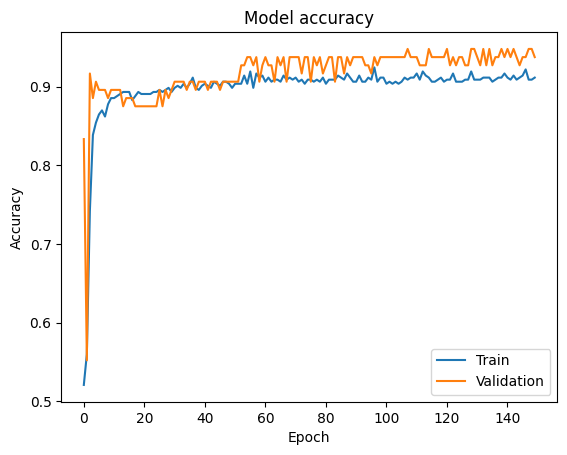

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

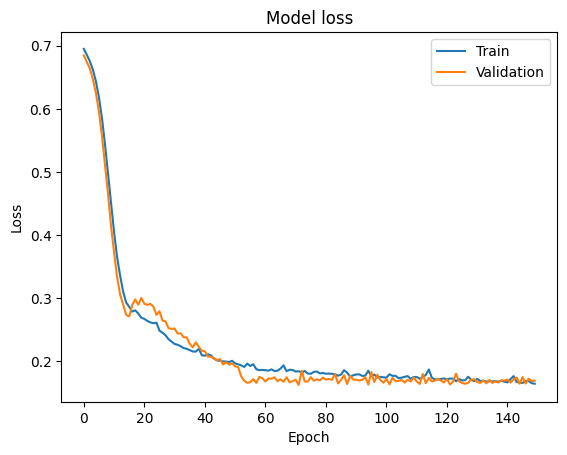

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [13]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.95      0.89      0.92        65

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



Text(0.5, 1.0, 'Test set Confusion Matrix')

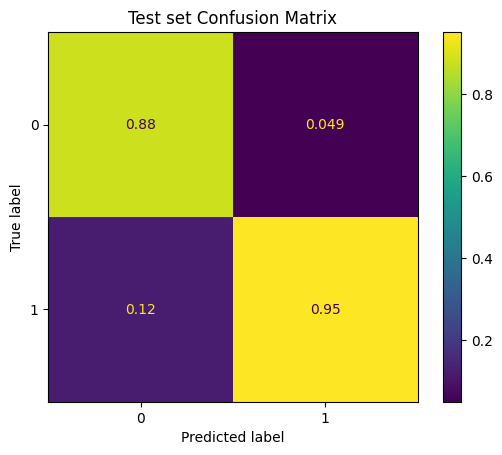

In [14]:
cm = confusion_matrix(y_test, y_pred, normalize='pred')
ConfusionMatrixDisplay(cm).plot()
plt.title('Test set Confusion Matrix')